# US Accidents Exploratory Data Analysis(EDA)

## About this Dataset
## Description
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset. Check here to learn more about this dataset.
- Download DataSet https://www.kaggle.com/sobhanmoosavi/us-accidents

## Ask & answer questions

- Which States and Cities have the most accidents?
- What is the time of the day, the day of the week and the month with the higher number of accidents?
- How many accidents per year? And what is the trend, increasing or decreasing?
- How are the basic weather conditions in most of the accident cases in US ?

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import folium
from folium import plugins
from folium.plugins import HeatMap
from wordcloud import WordCloud

## Data Preparation and Cleaning
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [6]:
numeric_df = df.count(numeric_only=True)
numeric_df

Severity             1516064
Start_Lat            1516064
Start_Lng            1516064
End_Lat              1516064
End_Lng              1516064
Distance(mi)         1516064
Number                469969
Temperature(F)       1473031
Wind_Chill(F)        1066748
Humidity(%)          1470555
Pressure(in)         1479790
Visibility(mi)       1471853
Wind_Speed(mph)      1387202
Precipitation(in)    1005515
Amenity              1516064
Bump                 1516064
Crossing             1516064
Give_Way             1516064
Junction             1516064
No_Exit              1516064
Railway              1516064
Roundabout           1516064
Station              1516064
Stop                 1516064
Traffic_Calming      1516064
Traffic_Signal       1516064
Turning_Loop         1516064
dtype: int64

In [7]:
len(numeric_df)

27

### Checking missing values 
- Percentage of missing values  for each column
- Due to the high number of missing value in the columns 'Number', 'Precipitation(in)', 'Wind_Chill(F)' are not going to be used in this analysis.

In [8]:
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)*100
missing_percentage

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

<AxesSubplot:>

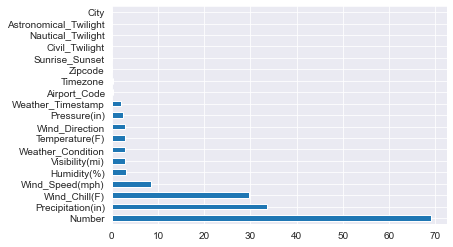

In [9]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

## Exploratory Analysis and Visualization

Columns we'll analyze:

- City
- Start Time
- Temperature
- Start Lat, Start Lng
- Weather Condition

## Location(City)

In [10]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [11]:
cities = df.City.unique()
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [12]:
len(cities)

10658

In [13]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

<AxesSubplot:title={'center':'No. of Accidents by City - Top 50 cities'}, xlabel='City', ylabel='count'>

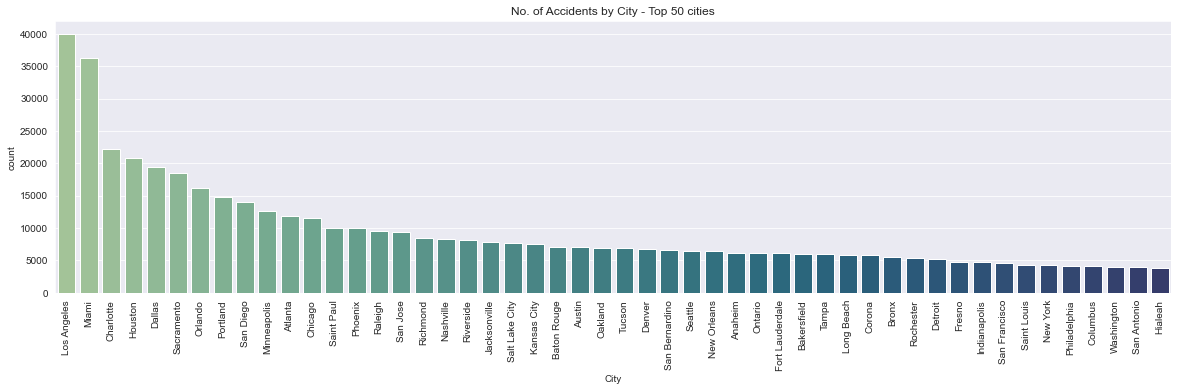

In [14]:
fig, ax = plt.subplots(figsize = (20,5))
cities_plot = sns.countplot(x=df.City, data=df, order=df.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest")
cities_plot.set_title("No. of Accidents by City - Top 50 cities")
cities_plot.set_xticklabels(cities_plot.get_xticklabels(), rotation=90)
cities_plot

- Percentage of cities with more and less than 1000 accidents

In [15]:
high_accident_city = cities_by_accident[cities_by_accident >=1000]
low_accident_city = cities_by_accident[cities_by_accident <1000]

In [16]:
len(high_accident_city)

251

In [17]:
len(high_accident_city) / len(cities)*100

2.3550384687558643

In [18]:
len(low_accident_city)

10406

In [19]:
len(low_accident_city) / len(cities)*100

97.63557890786264

- Percentage of cities with 1 accidents

In [20]:
one_accident_city = cities_by_accident[cities_by_accident == 1]
len(one_accident_city)

1167

In [21]:
len(one_accident_city) / len(cities)*100

10.949521486207543

 ## Start Time

In [22]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [23]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [24]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

- No. of Accidents by Hour

<AxesSubplot:title={'center':'No. of Accidents by Hour'}, xlabel='Start_Time', ylabel='count'>

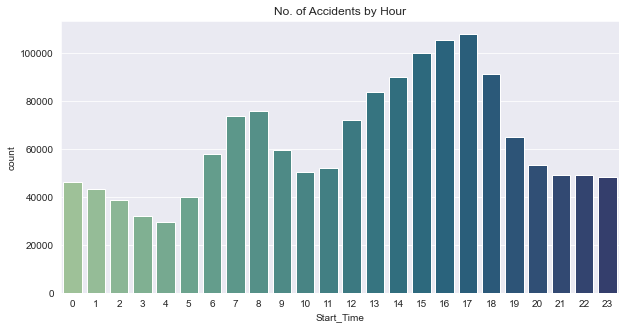

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
hour_plot = sns.countplot(x=df.Start_Time.dt.hour, data=df, orient = 'v', palette = "crest")
hour_plot.set_title("No. of Accidents by Hour")
hour_plot

- No. of Accidents by Day Of week

<AxesSubplot:title={'center':'No. of Accidents by Day Of week'}, xlabel='Start_Time', ylabel='count'>

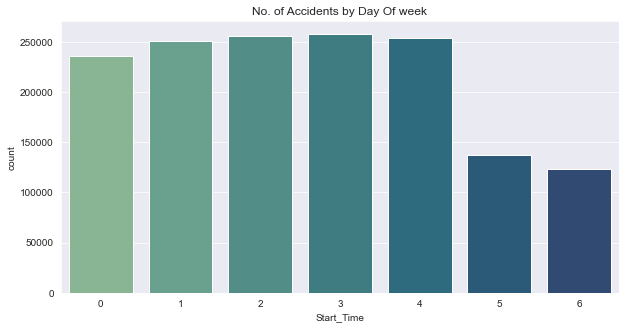

In [26]:
fig, ax = plt.subplots(figsize = (10,5))
hour_plot = sns.countplot(x=df.Start_Time.dt.dayofweek, data=df, orient = 'v', palette = "crest")
hour_plot.set_title("No. of Accidents by Day Of week")
hour_plot

Number of accidents by Month

<AxesSubplot:title={'center':'No. of Accidents by Month'}, xlabel='Start_Time', ylabel='count'>

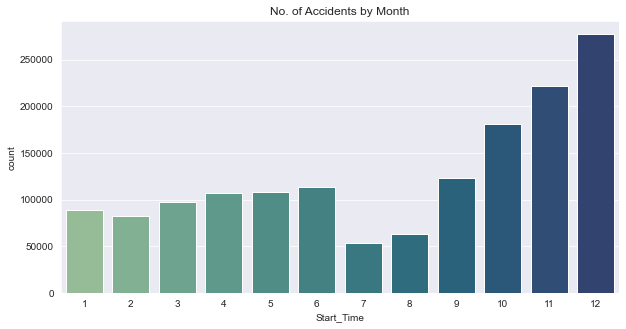

In [27]:
fig, ax = plt.subplots(figsize = (10,5))
hour_plot = sns.countplot(x=df.Start_Time.dt.month, data=df, orient = 'v', palette = "crest")
hour_plot.set_title("No. of Accidents by Month")
hour_plot

- This is showing the most number of accidents accour in December 
- There are some missing Data of some month in yaer of 2020

Number of accidents by Year

<AxesSubplot:title={'center':'No. of Accidents by Year'}, xlabel='Start_Time', ylabel='count'>

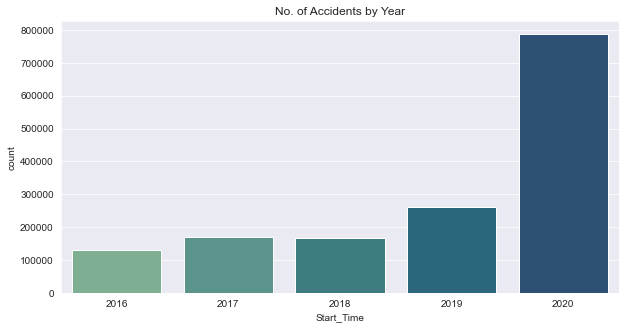

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
hour_plot = sns.countplot(x=df.Start_Time.dt.year, data=df, orient = 'v', palette = "crest")
hour_plot.set_title("No. of Accidents by Year")
hour_plot

## Temperature

In [29]:
temperature = df['Temperature(F)'].value_counts()
temperature

 59.0    32387
 63.0    31595
 68.0    30898
 57.0    30862
 64.0    30778
         ...  
-2.4         1
-23.3        1
-22.4        1
-9.8         1
-1.5         1
Name: Temperature(F), Length: 775, dtype: int64

<AxesSubplot:title={'center':'No. of Accidents by Temperature'}, xlabel='Temperature(F)', ylabel='count'>

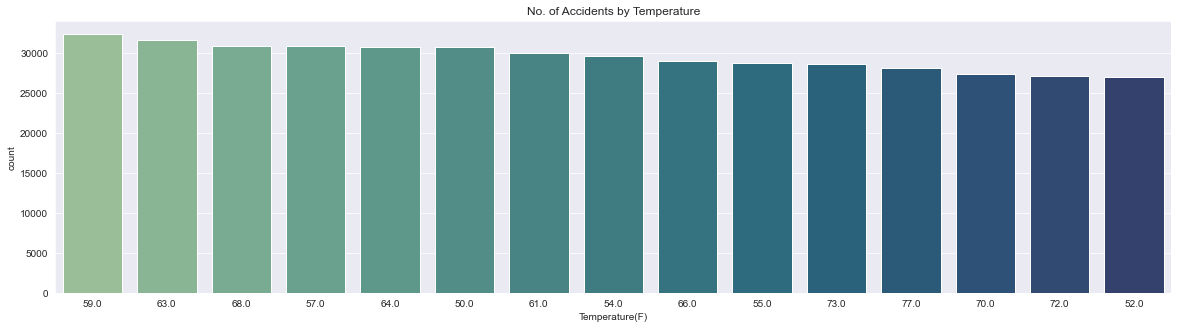

In [30]:
fig, ax = plt.subplots(figsize = (20,5))
temp_plot = sns.countplot(x=df['Temperature(F)'], data=df,order=df['Temperature(F)'].value_counts().iloc[:15].index, orient = 'v', palette = "crest")
temp_plot.set_title("No. of Accidents by Temperature")
temp_plot.set_xticklabels(temp_plot.get_xticklabels())
temp_plot

Most accidents happen on days with temperatures between 50°F and 75°F (10°C and 23°C)

### Start Lat, Start Lng

### Distribution on a map

In [31]:
sample_accidents = df.sample(int(0.1 * len(df)))

In [32]:
map = folium.Map(location = [40, -102], zoom_start = 4)
folium.plugins.HeatMap(zip(list(sample_accidents.Start_Lat), list(sample_accidents.Start_Lng)), scale_radius = False, radius = 12).add_to(map)
map

- There is a lower number of accidents in the central regions(Due regions is less populated)
- Both coasts have a higher number of accidents(High populated area).

## Weather Condition

In [33]:
weather = df.Weather_Condition.value_counts()
weather

Fair                        465252
Mostly Cloudy               193595
Clear                       180223
Cloudy                      161291
Partly Cloudy               133102
                             ...  
Dust Whirls                      1
Heavy Freezing Drizzle           1
Thunder and Hail / Windy         1
Light Haze                       1
Freezing Rain / Windy            1
Name: Weather_Condition, Length: 116, dtype: int64

<AxesSubplot:title={'center':'No. of Accidents by Weather Condition'}, xlabel='Weather_Condition', ylabel='count'>

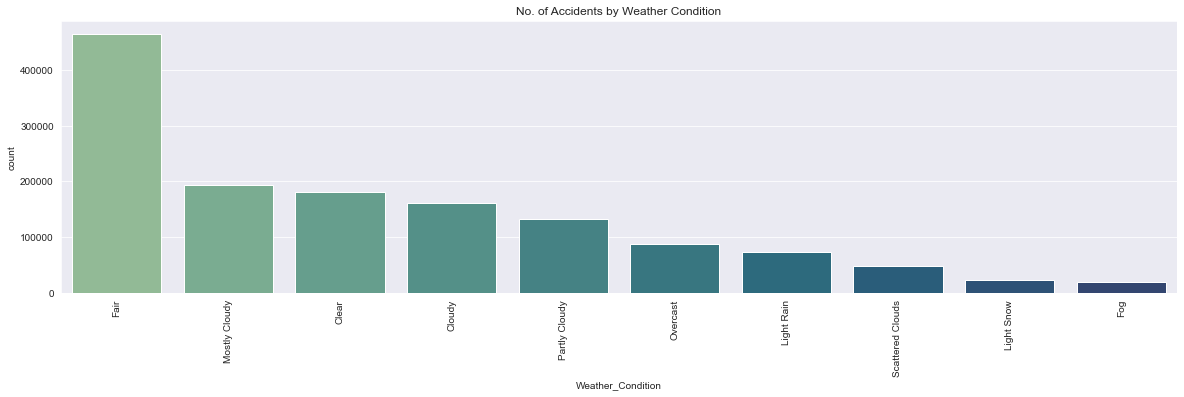

In [34]:
fig, ax = plt.subplots(figsize = (20,5))
wc_plot = sns.countplot(x=df.Weather_Condition, data=df,order=df.Weather_Condition.value_counts().iloc[:10].index, orient = 'v', palette = "crest")
wc_plot.set_title("No. of Accidents by Weather Condition")
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=90)
wc_plot

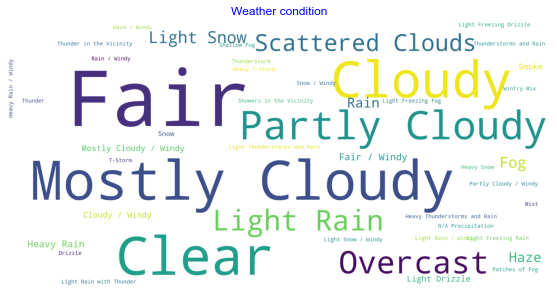

In [35]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
weather_words = df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(scale=5, max_words=100,background_color ='white').generate_from_frequencies(weather_words)
plt.imshow(wc)
plt.axis('off')
plt.title('Weather condition', color='b')
plt.show()

# Summary and Conclusion

## Insights

### About the location

- New York Data not available (need to investigate)
- Los Angeles is the city with highest no. of road accidents in US from (2016-2020).
- Only 2.35% (251) of the cities have more than 1000 accidents.
- 97.64% (10,406 Cities) cities have less than 1000 accidents.
- 11% (1167 Cities) cities have only 1 accident record in US from (2016-2020) (need to investigate).
- The number of accidents per city decreases exponentially (need to investigate)


### About the Timestamp
- In the mornings, accidents start to increase at 5 am and reach a higher point at 8 
- In the afternoon accidents start to increase at 13pm and reaches the higher point at 17pm
- on weekends number of accidents is lower.
- There are some missing Data of some month in year of 2020 (need to investigate).
- 2020 is the year with higest number of accidents (need to investigate).

### About the Temperature

- Most accidents happen on days with temperatures between 50°F and 75°F (10°C and 23°C)

### About the Weather

- Interestingly, most accidents happen on the days with a Fairweather, follow by days Mostly Cloudy.